# 1. Attribute selection in classification problems

### Curse of dimensionality

**Question** What is "curse of dimensionality"? What does it mean in practice?

**Question** How can we reduce the number of attributes in classification problems?


Download file seizure.csv containing information about the recording of brain activity of people (description of the dataset: https://archive.ics.uci.edu/dataset/388/epileptic+seizure+recognition).
Each row contains 178 subsequent EEG measurements conducted during 1 second (column), the last column represents the label y {1,2,3,4,5} (subjects in class 1 have epileptic seizure, other classes represent different control groups, such as eyes open (5), or eyes closed (4)).

The train and test split and normalization is already done. 
Your task is to classify the given data with k-NN with k=3 and measure the accuracy.

Next, try to eliminate redundant attributes. Reduce the number of attributes to 30. Use the SelectKBest class. Remember to fit it only on train data. To reduce the test data to obtain only remained parameters use transform method on fit SelectKBest object. Use mutual_info_classif measure to assess the relevance of attributes.


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

data = pd.read_csv("seizure.csv")
data_Y = data["y"]
data = data.drop(columns=["Name", "y"])

X_train, X_test, y_train, y_test = train_test_split(data, data_Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Najpierw uczymy k-NN na wszystkich cechach
knn_full = KNeighborsClassifier(n_neighbors=3)
knn_full.fit(X_train, y_train)
y_pred_full = knn_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Dokładność k-NN na wszystkich cechach: {accuracy_full:.4f}")

# Następnie wybieramy 30 najlepszych cech 
selector = SelectKBest(score_func=mutual_info_classif, k=30)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Trenujemy k-NN na zredukowanym zbiorze cech
knn_selected = KNeighborsClassifier(n_neighbors=3)
knn_selected.fit(X_train_selected, y_train)
y_pred_selected = knn_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f"Dokładność k-NN na 30 najlepszych cechach: {accuracy_selected:.4f}")

Dokładność k-NN na wszystkich cechach: 0.4785
Dokładność k-NN na 30 najlepszych cechach: 0.4804


In the exercise above we set the number of features arbitrarily. 

**Question** How can we find the optimal number of attributes in machine learning problems?

# 2. Clustering

**Question** What is clustering? What can we achieve with clustering?

**Question** What clustering algorithms do you know?

# 3. K-means algorithm

**Question** What are the following steps of the k-means algorithm?

**Question** How can we choose the initial clusters?


**Exercise**
Given the following examples of grades od 5 students we want to divide them into 2 groups:

| Subject | A   | B   |
|---------|-----|-----|
| 1       | 1.0 | 1.0 |
| 2       | 1.5 | 2.0 |
| 3       | 3.0 | 3.0 |
| 4       | 5.0 | 7.0 |
| 5       | 3.5 | 5.0 |

We have chosen the two furthest students (using euclidean distance) as the initial clusters' centroids:

|Cluster|Centroid|A  |B  |
|-------|--------|---|---|
|C1     |k1      |1.0|1.0|
|C2     |k2      |5.0|7.0|

Perform the first iteration of k-means: divide all students into clusters and find the centroids of these clusters.


**Question** When the algorithm should stop?

**Question** What advantages and disadvantages of k-means clustering can you find?

# 4. K-means with scikit-learn

### 4.1. Download files mouse.csv and lines.csv. They have multiple examples described with 2 attributes.  You are given the functions to read files and plot the data. Use these functions to plot data from both files. Can you manually determine 3 clusters in each of the files?

In [6]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

def read_file(path):
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
        data = [row for row in reader]
        data = StandardScaler().fit_transform(data)
    return np.array(data)

def plot_data(data):
    plt.scatter(data[:,0], data[:, 1])
    plt.show()

Mouse dataset shape: (1992, 2)


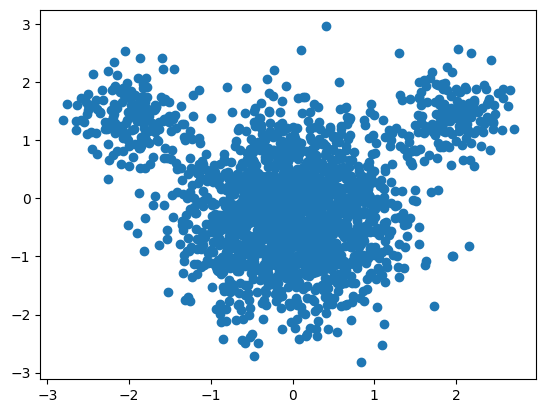

Lines dataset shape: (999, 2)


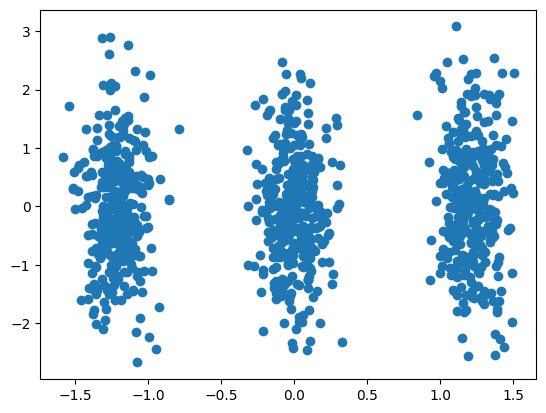

In [7]:
# Wczytujemy i wizualizujemy dane z mouse.csv
mouse_data = read_file("mouse.csv")
print(f"Mouse dataset shape: {mouse_data.shape}")
plot_data(mouse_data)

# Wczytujemy i wizualizujemy dane z lines.csv
lines_data = read_file("lines.csv")
print(f"Lines dataset shape: {lines_data.shape}")
plot_data(lines_data)


### 4.2 Now, let's try to use k-means on the obtained dataset. Again, you are given a function to visualize the obtained plot. Your task is to use KMeans with propoer parameters on "mouse" and "lines" datasets and see if the clusters generated by k-means are the same that you suggested in the previous exercise.

See documentation and examples: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [8]:
def visualize_clusters(clusters, centroids): 
    #clusters: list of numpy arrays (each array with examples in one cluster)
    #centroids: numpy array
    for c in clusters:
        plt.scatter(c[:,0], c[:,1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='+', color='black', s=100)
    plt.show()

Mouse dataset - liczba punktów w każdym klastrze:
Klaster 1: 1208 punktów
Klaster 2: 387 punktów
Klaster 3: 397 punktów


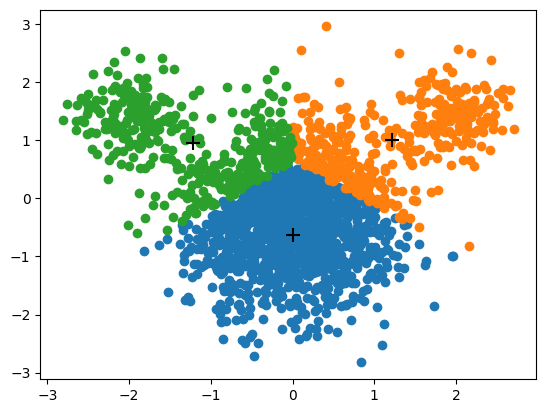


Lines dataset - liczba punktów w każdym klastrze:
Klaster 1: 347 punktów
Klaster 2: 309 punktów
Klaster 3: 343 punktów


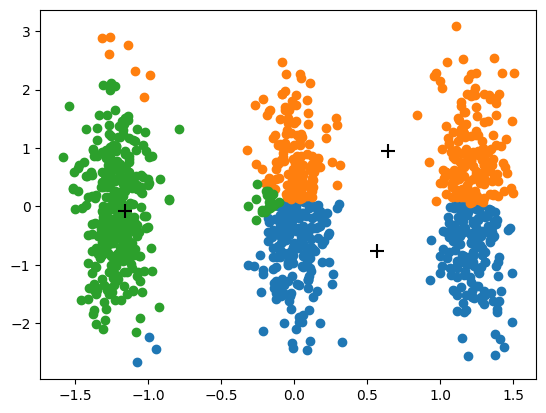

In [ ]:
from sklearn.cluster import KMeans

# Klasteryzacja danych mouse.csv
kmeans_mouse = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_mouse = kmeans_mouse.fit_predict(mouse_data)
centroids_mouse = kmeans_mouse.cluster_centers_

# Przygotowanie danych do wizualizacji, dzielimy na klastery
clusters_mouse = [mouse_data[labels_mouse == i] for i in range(3)]
print("Mouse dataset - liczba punktów w każdym klastrze:")
for i, cluster in enumerate(clusters_mouse):
    print(f"Klaster {i+1}: {len(cluster)} punktów")
visualize_clusters(clusters_mouse, centroids_mouse)

# Klasteryzacja danych lines.csv
kmeans_lines = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_lines = kmeans_lines.fit_predict(lines_data)
centroids_lines = kmeans_lines.cluster_centers_

# Przygotowanie danych do wizualizacji, dzielimy na klastery
clusters_lines = [lines_data[labels_lines == i] for i in range(3)]
print("\nLines dataset - liczba punktów w każdym klastrze:")
for i, cluster in enumerate(clusters_lines):
    print(f"Klaster {i+1}: {len(cluster)} punktów")
visualize_clusters(clusters_lines, centroids_lines)


# 5. Attribute selection in unsupervised problems

As in unsupervised learning problems (such as clustering) we do not have decision classess, so attribute selection methods based on info gain, chi2 etc. are not applicable here.

**Question** What can we do when we want to reduce the number of features in unsupervised problems?

We will try to use two attribute selection methods, which can be used in clustering (unsupervised learning): removing low-variance attributes and removing correlated attributes.

You are given code which reads real-world dataset containing data about customers and saves it in 'data' data frame. 

**Task** Perform attribute selection using the methods above. Firstly, you can use VarianceThreshold class (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). Try different values of threashold and compare how many attributes have been removed. Next, you can use corr() method of DataFrame to obtain the correlation matrix. What can we deduce from this matrix? How can we use it to feature selection? Try to implement proper attribute selection based on correlations.

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

data = pd.read_csv("customers.csv")
data = data.drop(columns="Address")
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [26]:
# 1. Selekcja cech na podstawie wariancji (VarianceThreshold)
print("Selekcja cech na podstawie wariancji\n")

# Sprawdzamy wariancję każdej cechy
print("Wariancja każdej cechy:")
print(data.var().sort_values())

# Próbujemy różne progi wariancji
thresholds = [0.0, 0.1, 1.0, 10.0, 100.0]
for threshold in thresholds:
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(data.select_dtypes(include=[np.number]))
    n_features_before = data.select_dtypes(include=[np.number]).shape[1]
    n_features_after = X_selected.shape[1]
    print(f"Próg wariancji: {threshold:.1f} | Cechy przed: {n_features_before} | Cechy po: {n_features_after} | Usunięto: {n_features_before - n_features_after}")

# Wybieramy próg 1.0 jako rozsądny
selector_var = VarianceThreshold(threshold=1.0)
numeric_data = data.select_dtypes(include=[np.number])
X_var_selected = selector_var.fit_transform(numeric_data)
selected_features_var = numeric_data.columns[selector_var.get_support()]
print(f"\nWybrane cechy po selekcji wariancji: {list(selected_features_var)}")

# 2. Selekcja cech na podstawie korelacji
print("\nSelekcja cech na podstawie korelacji\n")

# Obliczamy macierz korelacji
corr_matrix = numeric_data.corr().abs()
print("Macierz korelacji (wartości bezwzględne):")
print(corr_matrix)

# Znajdujemy pary cech o wysokiej korelacji (>0.6)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.6:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print(f"\nPary cech o wysokiej korelacji (>0.6): {len(high_corr_pairs)}")
for feat1, feat2, corr_val in high_corr_pairs[:10]:  # pokazujemy pierwsze 10
    print(f"{feat1} <-> {feat2}: {corr_val:.3f}")

# Usuwamy jedną cechę z każdej pary o wysokiej korelacji
def remove_correlated_features(df, threshold=0.6):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    to_remove = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return df.drop(columns=to_remove), to_remove

data_corr_selected, removed_features = remove_correlated_features(numeric_data, threshold=0.6)
print(f"\nUsunięte cechy z powodu wysokiej korelacji: {removed_features}")
print(f"Cechy przed selekcją korelacji: {numeric_data.shape[1]}")
print(f"Cechy po selekcji korelacji: {data_corr_selected.shape[1]}")

Selekcja cech na podstawie wariancji

Wariancja każdej cechy:
Defaulted              0.193360
Edu                    0.860783
Card Debt              4.519210
Other Debt            11.551833
DebtIncomeRatio       45.150891
Years Employed        45.939706
Age                   64.664623
Income              1485.566998
Customer Id        60279.166667
dtype: float64
Próg wariancji: 0.0 | Cechy przed: 9 | Cechy po: 9 | Usunięto: 0
Próg wariancji: 0.1 | Cechy przed: 9 | Cechy po: 9 | Usunięto: 0
Próg wariancji: 1.0 | Cechy przed: 9 | Cechy po: 7 | Usunięto: 2
Próg wariancji: 10.0 | Cechy przed: 9 | Cechy po: 6 | Usunięto: 3
Próg wariancji: 100.0 | Cechy przed: 9 | Cechy po: 2 | Usunięto: 7

Wybrane cechy po selekcji wariancji: ['Customer Id', 'Age', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']

Selekcja cech na podstawie korelacji

Macierz korelacji (wartości bezwzględne):
                 Customer Id       Age       Edu  Years Employed    Income  \
Customer Id  

# Homework

* Write your own implementation of k-means algorithm with random centroid initialization and 2 stopping conditions: max iterations and centroid convergence (if all attributes of all centroids changes not more than some epsilon the algorithm should stop). 
* Use your implementation to cluster data about cereal products with their dietary characteristics (cereals.csv, 16 attributes). 
* It contains some nominal attributes (name, mfr, type). You can omit the first two of them. Type attribute is binary, so you can replace it with values 0 and 1.
* Perform the clustering of the cereals into 3 groups using k-means algorithm. 
* Remember to preprocess the data: normalization/standardization, attribute selection. 
* Try to describe the obtained groups based on the obtained centroids. What do all cereals within a certain group have in common?
* Write a report containing information about preprocessing methods that you used, number of cereals within each cluster, and your conclusions about the clustering results.

**Deadline +2 weeks**

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

class MyKMeans:
    def __init__(self, n_clusters=3, max_iters=100, epsilon=1e-4, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.epsilon = epsilon
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None
        
    def _initialize_centroids(self, X):
        """Losowa inicjalizacja centroidów"""
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        centroids = np.zeros((self.n_clusters, n_features))
        for i in range(self.n_clusters):
            centroids[i] = X[np.random.choice(n_samples)]
        return centroids
    
    def _assign_clusters(self, X, centroids):
        """Przypisanie punktów do najbliższych centroidów"""
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def _update_centroids(self, X, labels):
        """Aktualizacja centroidów jako średnich punktów w klastrach"""
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            if np.sum(labels == i) > 0:
                centroids[i] = X[labels == i].mean(axis=0)
            else:
                # Jeśli klaster pusty, losujemy nowy centroid
                centroids[i] = X[np.random.choice(X.shape[0])]
        return centroids
    
    def _check_convergence(self, old_centroids, new_centroids):
        """Sprawdzenie zbieżności - czy zmiana centroidów < epsilon"""
        return np.all(np.abs(old_centroids - new_centroids) < self.epsilon)
    
    def fit(self, X):
        """Główna metoda uczenia"""
        # Inicjalizacja
        self.centroids = self._initialize_centroids(X)
        
        for iteration in range(self.max_iters):
            # Przypisanie punktów do klastrów
            labels = self._assign_clusters(X, self.centroids)
            
            # Zapamiętanie starych centroidów
            old_centroids = self.centroids.copy()
            
            # Aktualizacja centroidów
            self.centroids = self._update_centroids(X, labels)
            
            # Sprawdzenie zbieżności
            if self._check_convergence(old_centroids, self.centroids):
                print(f"Zbieżność osiągnięta po {iteration + 1} iteracjach")
                break
        
        self.labels_ = labels
        return self
    
    def predict(self, X):
        """Przewidywanie klastrów dla nowych danych"""
        return self._assign_clusters(X, self.centroids)



# Wczytanie danych
cereals_df = pd.read_csv("cereal.csv")
# Usunięcie kolumn name i mfr
cereals_processed = cereals_df.drop(columns=["name", "mfr"])
# Zamiana typu na wartości 0 i 1 (C=0, H=1)
cereals_processed["type"] = cereals_processed["type"].map({"C": 0, "H": 1})

print(f"\nDane po usunięciu name i mfr, zamianie type:")
print(cereals_processed.head())

# Separacja cech i nazw płatków 
cereal_names = cereals_df["name"].values
X_cereals = cereals_processed.values

print(f"\nDane do klasteryzacji - kształt: {X_cereals.shape}")

# Normalizacja
scaler = StandardScaler()
X_cereals_scaled = scaler.fit_transform(X_cereals)
print("\nDane zostały znormalizowane (StandardScaler)")


# Selekcja

# Usunięcie cech o niskiej wariancji
variance_selector = VarianceThreshold(threshold=0.1)
X_cereals_selected = variance_selector.fit_transform(X_cereals_scaled)
selected_features = cereals_processed.columns[variance_selector.get_support()]

print(f"\nSelekcja cech (VarianceThreshold, próg=0.1):")
print(f"Cechy przed: {X_cereals_scaled.shape[1]}")
print(f"Cechy po: {X_cereals_selected.shape[1]}")
print(f"Wybrane cechy: {list(selected_features)}")


# Klasteryzacja 

print("\nKlasteryzacja k-means (3 klastery)")
kmeans_cereals = MyKMeans(n_clusters=3, max_iters=100, epsilon=1e-4, random_state=42)
kmeans_cereals.fit(X_cereals_selected)

labels_cereals = kmeans_cereals.labels_
centroids_cereals = kmeans_cereals.centroids

# Liczba płatków w każdym klastrze
unique, counts = np.unique(labels_cereals, return_counts=True)
print("\nLiczba płatków w każdym klastrze:")
for cluster_id, count in zip(unique, counts):
    print(f"Klaster {cluster_id + 1}: {count} płatków")


# Analiza klastrów
print("\nAnaliza centroidów klastrów")
print("Centroidy (wartości znormalizowane):")
for i, centroid in enumerate(centroids_cereals):
    print(f"\nKlaster {i + 1}:")
    for j, feature_name in enumerate(selected_features):
        print(f"  {feature_name}: {centroid[j]:.4f}")


# Przykłady płatków w każdym klastrze
print("\nPrzykłady płatków w każdym klastrze")
for cluster_id in range(3):
    cluster_indices = np.where(labels_cereals == cluster_id)[0]
    print(f"\nKlaster {cluster_id + 1} (przykłady):")
    for idx in cluster_indices[:5]:  # pokazujemy pierwsze 5
        print(f"  - {cereal_names[idx]}")



Dane po usunięciu name i mfr, zamianie type:
   type  calories  protein  fat  sodium  fiber  carbo  sugars  potass  \
0     0        70        4    1     130   10.0    5.0       6     280   
1     0       120        3    5      15    2.0    8.0       8     135   
2     0        70        4    1     260    9.0    7.0       5     320   
3     0        50        4    0     140   14.0    8.0       0     330   
4     0       110        2    2     200    1.0   14.0       8      -1   

   vitamins  shelf  weight  cups     rating  
0        25      3     1.0  0.33  68.402973  
1         0      3     1.0  1.00  33.983679  
2        25      3     1.0  0.33  59.425505  
3        25      3     1.0  0.50  93.704912  
4        25      3     1.0  0.75  34.384843  

Dane do klasteryzacji - kształt: (77, 14)

Dane zostały znormalizowane (StandardScaler)

Selekcja cech (VarianceThreshold, próg=0.1):
Cechy przed: 14
Cechy po: 14
Wybrane cechy: ['type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'c